# Distribution generation

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sample_range = [1000, 10000, 1000000]
dim_range = [2, 3, 5, 8]

In [3]:
data_dir = 'datasets/'
file_suffix = '.csv'

os.makedirs(data_dir, exist_ok=True)

## Gaussian / normal distribution

In [4]:
for n_samples in sample_range:
    for dim in dim_range:
        mean = np.ones((dim)) * 10
        cov = np.eye(dim) * 9

        x = np.random.multivariate_normal(mean, cov, n_samples) * 100
        fname = data_dir + \
        'gaussian_size' + str(n_samples) + \
        '_dim' + str(dim) + file_suffix
        np.savetxt(fname, x, delimiter=',')

## Uniform distribution

In [5]:
for n_samples in sample_range:
    for dim in dim_range:

        x = np.random.uniform(size=(n_samples, dim)) * 100
        fname = data_dir + \
        'uniform_size' + str(n_samples) + \
        '_dim' + str(dim) + file_suffix
        np.savetxt(fname, x, delimiter=',')

## Correlated distribution

In [6]:
for n_samples in sample_range:
    for dim in dim_range:

        mean = np.ones((dim))
        std = np.ones((dim)) * 2.5
        corr = 0.85
        
        cov = np.eye(dim) * np.diag(std**2)
        
        for d1 in range(1, dim):
            for d2 in range(dim-1):
                if d1 != d2:
                    cov[d1][d2] = cov[d2][d1] = std[d1]*std[d2]*corr
    
        x = np.random.multivariate_normal(mean, cov, n_samples) * 100
        fname = data_dir + \
        'correlated' + \
        '_size' + str(n_samples) + \
        '_dim' + str(dim) + file_suffix
        np.savetxt(fname, x, delimiter=',')

## Anti-correlated distribution

In [7]:
for n_samples in sample_range:
    for dim in dim_range:

        mean = np.ones((dim))
        std = np.ones((dim)) * 2.5
        corr = -0.85
        
        cov = np.eye(dim) * np.diag(std**2)
        corr_dim = np.random.randint(1, dim)
        cov[corr_dim][corr_dim-1] = cov[corr_dim-1][corr_dim] = std[corr_dim]*std[corr_dim-1]*corr
        x = np.random.multivariate_normal(mean, cov, n_samples) * 100
        fname = data_dir + \
        'anticorrelated_' + str(corr_dim) + '_' + str(corr_dim - 1) + \
        '_size' + str(n_samples) + \
        '_dim' + str(dim) + file_suffix
        np.savetxt(fname, x, delimiter=',')

# Plots

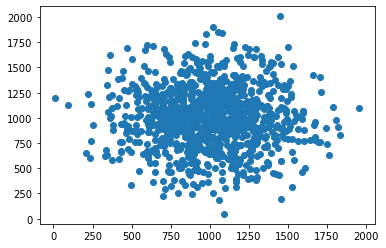

In [8]:
x = np.loadtxt(data_dir + 'gaussian_size1000_dim2.csv', delimiter=',')
plt.scatter(x[:,0], x[:,1]);

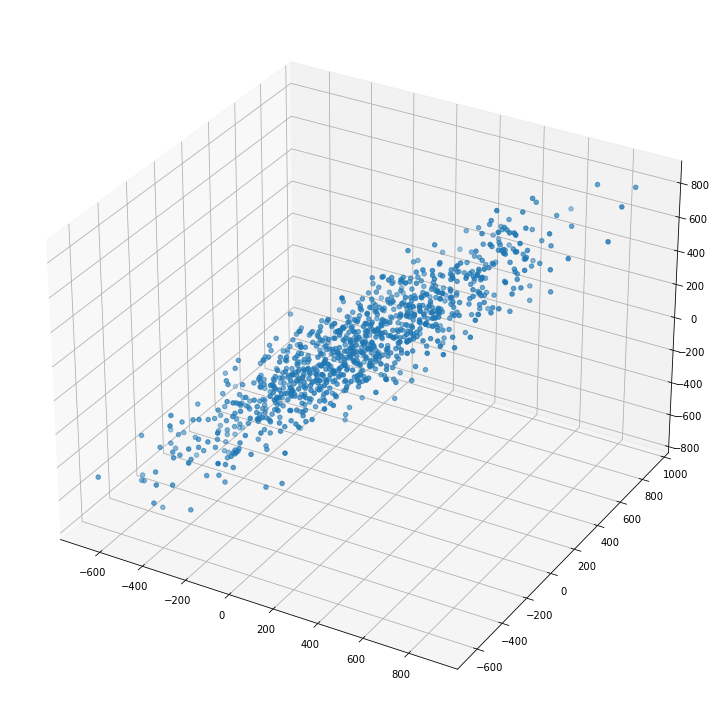

In [9]:
x = np.loadtxt(data_dir + 'correlated_size1000_dim5.csv', delimiter=',')
# plt.scatter(x[:,3], x[:,4])
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2]);

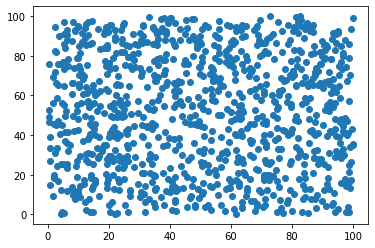

In [10]:
x = np.loadtxt(data_dir + 'uniform_size1000_dim2.csv', delimiter=',')
plt.scatter(x[:,0], x[:,1]);

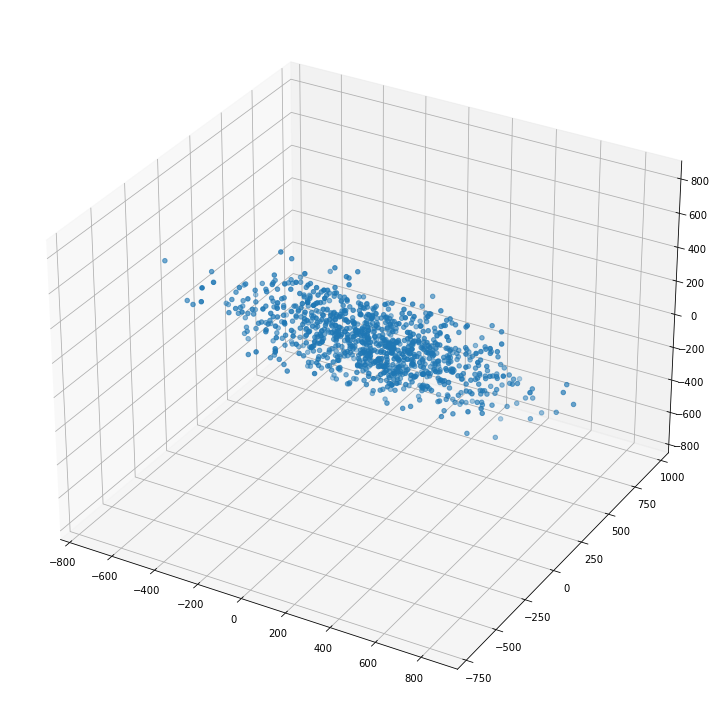

In [11]:
x = np.loadtxt(data_dir + 'anticorrelated_3_2_size1000_dim5.csv', delimiter=',')
# plt.scatter(x[:,2], x[:,3]);
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,1], x[:,2], x[:,3]);